<div style="border:solid black 2px; padding: 20px">
<b>Алексей, привет!</b>

Меня зовут Полина Бережная, и я буду делать ревью проекта по машинному обучению. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

Твой проект просто 🔥🔥🔥. Видно, что ты уверенно кодишь и понимаешь базу машинного обучения. Мне было очень приятно читать твои лаконичные и информативные выводы. Твой уровень подачи материала находится на очень высоком уровне. Я не нашла никаких недочетов. Ты умница!
    
Чтобы ревью было для тебя полезным, я оставила несколько комментариев:

- <div class="alert alert-warning">
    
  **Комментарий ревьюера**
    
   Так выделены не обязательные к доработке моменты. Mожешь учесть их при выполнении будущих заданий. На твое усмотрение.
  </div>
     
    
- <div class="alert alert-success">
    
  **Комментарий ревьюера**
    
    Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    
    
Если будут какие-то вопросы по ревью, обязательно свяжись со мной через куратора или в Slack.
    
Успехов тебе во всех начинаниях!

</div>

# Исследование оттока клиентов сети фитнес-центров 

Объект анализа - данные о 4000 клиентов сети фитнес-центров. В датасете содержится информация о клиенте за предыдущий до проверки факта оттока месяц, а также информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента.

Цель исследования - проанализировать предоставленные данные и подготовить план действий по удержанию клиентов:

 - вычисление вероятности оттока для каждого клиента;
 - определение основных признаков, наиболее сильно влияющие на отток;
 - повышение качества работы с клиентами на основании сегментации аудитории;

План работы:

    1 - Загрузка и обзор данных 
    2 - Исследовательский анализ
    3 - Прогноз оттока клиентов
    4 - Кластеризация клиентов
    5 - Выводы и рекомендации

<div class="alert alert-success">

**Комментарий ревьювера**

Здорово, что перед кодом есть описание целей проекта, а также план твоих действий 👍🏻. Да и все оформление тетрадки выполнено на достойном уровне. Она рассказывает историю за тебя и показывает как твои кодинговые навыки, так и умение анализировать и преподносить информацию :) 
    
    

In [1]:
!pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np

from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

### Загрузка и обзор данных

In [3]:
raw_df = pd.read_csv("/datasets/gym_churn.csv")

In [4]:
print('Первые 5 строк:')
display(raw_df.head())
print()
print('Информация о содержащихся данных:')
print()
display(raw_df.info())
print('Обзор числовых данных:')
display(raw_df.describe())
print('Число дубликатов:')
display(raw_df.duplicated().sum())

Первые 5 строк:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 K

None

Обзор числовых данных:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Число дубликатов:


0

<div class="alert alert-warning">

**Комментарий ревьювера**
    
Здорово, что ты заметил, что у нас очень разные по величине стандартные отклонения.
Это говорит о том, что переменные нужно стандартизировать перед обучением. Для логистической регрессии и дерева это не обязательно, но вообще это уже такое внегласное правило. Лучше сразу стандартизировать все, а потом уже гонять модели. Стоит указывать на данный нюанс в выводе.

В датассете нет пропущенных значений и дубликатов. Типы данных во всех столбцах соответствуют характеру содержащейся в них информации.

Возраст клиентов фитнес-центров варьируется от 18 до 41 года. Время удержания клиентов в диапазоне до 31 месяца, т.е. данные содержат информацию минимум за 2.5 года. В среднем число ушедших в отток клиентов составляет 26.5%, а срок удержания клиента - 3.72 месяца.

<div class="alert alert-success">

**Комментарий ревьювера**

Ты отлично владеешь методами первичного изучения данных!
    
Также хочется похвалить за анализ портрета среднестатистического клиента 👍🏻

### Исследовательский анализ

Проанализируем средние значения признаков в группе клиентов, ушедших в отток и группе оставшихся клиентов

In [5]:
churn_grouped = raw_df.groupby('Churn').mean()
churn_grouped.head().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Видно, что в среднем люди, пришедшие по партнерской программе или сотрудники компании-партнера клуба реже уходят в отток, чем другие клиенты. Оставшийся срок абонемента у тех, кто уходит в отток составляет 1.66 месяца против 5.28 у действующих клиентов. 
У ушедших клиентов так же значительно ниже средний срок текущего действующего абонемента и время удержания.

In [6]:
# Создадим отдельные датасеты ушедших и оставшихся клиентов

df = raw_df.copy()
churn1 = df[df['Churn']==1].drop('Churn', axis=1)
churn0 = df[df['Churn']==0].drop('Churn', axis=1)

Построим гистограммы распределений признаков в обеих группах

In [7]:
# Функция отрисовки распределения всех параметров в двух группах

def plot_dist(data):

    churn1 = data[data['Churn']==1].drop('Churn', axis=1)
    churn0 = data[data['Churn']==0].drop('Churn', axis=1)
    fig, axs = plt.subplots(4, 4, figsize = (16,13))

    for j in range(4):
        for i in range(4):
            if (i+j*4)<13:

                feature = churn0.columns.values[i+j*4]
                axs[i, j].set(xlabel = feature)
                axs[i, j].hist(churn0[feature], bins = int(np.sqrt(len(churn0[feature]))),  alpha = 0.5)
                axs[i, j].hist(churn1[feature], bins = int(np.sqrt(len(churn1[feature]))),  alpha = 0.5)
                fig.tight_layout()

            else: pass

    red_patch = mpatches.Patch(color='#98bcd4', label='Оставшиеся клиенты')
    blue_patch = mpatches.Patch(color='#f8c48c', label='Ушедшие клиенты')
    fig.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(.97, 0.72))

    plt.show()


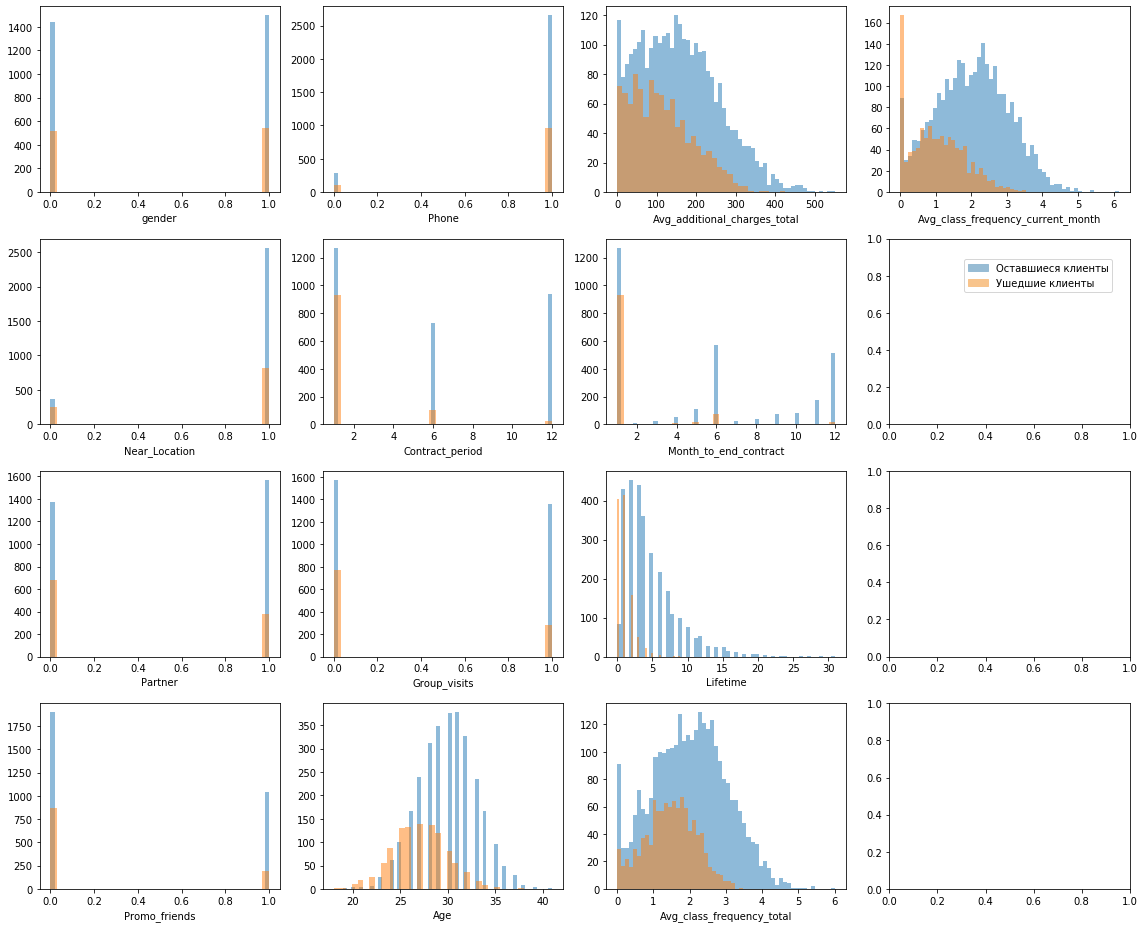

In [8]:
plot_dist(df)

На графиках отчетливо видно, что распределения по многим признакам существенно отличаются в группах ушедших и оставшихся пользователей. 

Построим таблицу корелляции признаков, чтобы выяснить какие параметры больше всего влияют на отток клиентов, а также проверить датасет на мультиколлинеарность признаков.

<div class="alert alert-success">

**Комментарий ревьювера**
    
Эстетичные визуализации и хороший анализ классов 👍🏻

In [9]:
correlation = df.corr()
correlation

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


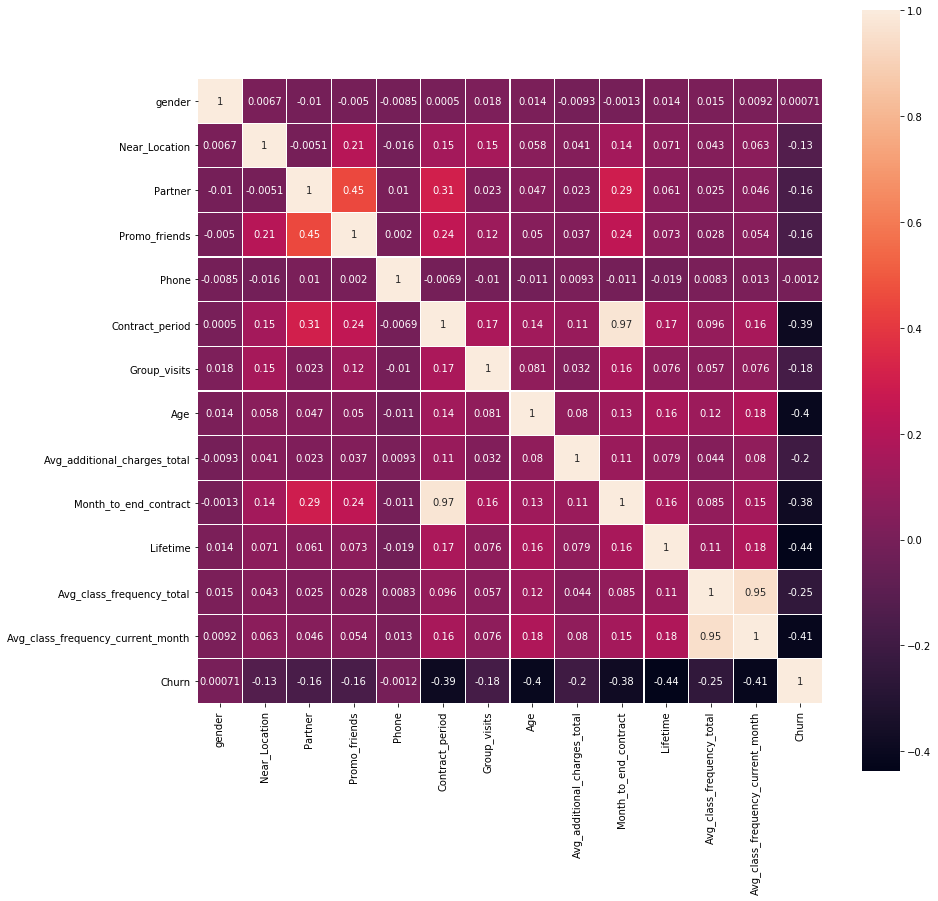

In [10]:
# Построим тепловую диаграмму корелляции признаков

fig, axs = plt.subplots(figsize = (14,14))
sns.heatmap(correlation, annot = True, square=True,  linewidths=.2);

Видно, что большинство параметров слабо кореллируют с целевым столбцом Churn. Коэффициент корелляции на уровне 0.4 имеют поля с информацией о сроке абонемента, возрасте клиента, оставшееся время абонемента, время  первого посещения и средняя частота посещений в неделю за предыдущий месяц.

Очевидно наличие сильной корелляции между парамертами "Month_to_end_contract" и "Contract_period", а так же между "Avg_class_frequency_total" и "Avg_class_frequency_current_month". Чтобы избежать усиления влияния этих факторов над остальными параметрами в дальнейшем исследовании, удалим по одному критерию из каждой пары и сравним полученные результаты работы алгоритмов с кореллирующими признаками и без них.

In [11]:
df2 = df.drop(['Contract_period',  'Avg_class_frequency_current_month'], axis = 1)
df2.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.020398,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.922936,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.205633,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,0


<div class="alert alert-success">

**Комментарий ревьювера**
    
Все верно!

###  Прогноз оттока клиентов

In [12]:
# Разделим датасет на матрицу признаков и таргет-вектор 

X = df.drop('Churn', axis=1)
y = df['Churn']

X2 = df2.drop('Churn', axis=1)

<div class="alert alert-warning">

**Комментарий ревьюера**

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:

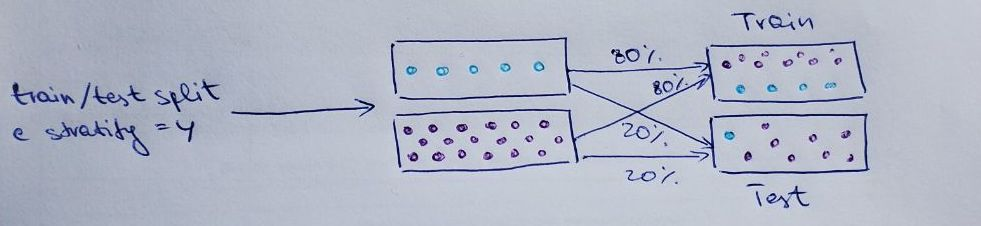
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.</div>

In [13]:
# Разобьем данные на обучающую и валидационную выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

Построим модель бинарной классификации клиентов используя алгоритм логистической регрессии

In [14]:
# Определяем модель регрессии
lr_model1 = LogisticRegression(solver='liblinear', random_state = 0) 

# Обучаем модель на тренировочных данных
lr_model1.fit(X_train, y_train)

# Получаем результат работы модели на тестовой части датасета
lr_pred1 = lr_model1.predict(X_test)  

# Повторим для датасета без кореллирующих признаков
lr_model2 = LogisticRegression(solver='liblinear', random_state = 0) 

lr_model2.fit(X2_train, y_train)

lr_pred2 = lr_model2.predict(X2_test)  

In [15]:
print('Метрики логистической регрессии с кореллирующими параметрами')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_pred1)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_pred1)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_pred1)))

Метрики логистической регрессии с кореллирующими параметрами
Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [16]:
print('Метрики логистической регрессии без кореллирующих параметров')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_pred2)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_pred2)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_pred2)))

Метрики логистической регрессии без кореллирующих параметров
Accuracy: 0.88
Precision: 0.76
Recall: 0.77


Отбрасывание кореллирующих параметров ухудшило работу алгоритма логистической регрессии. Проверим как оно скажется на другой модели

Построим модель бинарной классификации клиентов используя алгоритм Random Forest

In [17]:
# Определяем модель Random Forest
rf_model1 = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Обучаем модель на тренировочных данных
rf_model1.fit(X_train, y_train)

# Получаем результат работы модели на тестовой части датасета
rf_pred1 = rf_model1.predict(X_test)

# Повторим для датасета без кореллирующих признаков
rf_model2 = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf_model2.fit(X2_train, y_train)

rf_pred2 = rf_model2.predict(X2_test)

In [18]:
print('Метрики алгоритма Random Forest с кореллирующими параметрами')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_pred1)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_pred1)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_pred1)))

Метрики алгоритма Random Forest с кореллирующими параметрами
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


In [19]:
print('Метрики алгоритма Random Forest без кореллирующих параметров')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_pred2)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_pred2)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_pred2)))

Метрики алгоритма Random Forest без кореллирующих параметров
Accuracy: 0.90
Precision: 0.80
Recall: 0.77


Значения всех трех метрик выше для случая с кореллирующими параметрами. Это можно объяснить недостаточно большим размером датасета для выявления слабых взаимосвязей между целевым и остальными параметрами. В дальнейшем исследовании мы сохраним кореллирующие столбцы, т.к. они не снижают качество работы моделей.

In [20]:
# Построим итоговую таблицу 

fr_tab = pd.DataFrame({'Metric':['Accuracy', 'Precision', 'Recall'], 
                      'Logistic Regression with multicollinearity':[round(accuracy_score(y_test, lr_pred1),2), round(precision_score(y_test, lr_pred1),2), round(recall_score(y_test, lr_pred1),2)],
                    'Logistic Regression without multicollinearity':[round(accuracy_score(y_test, lr_pred2),2), round(precision_score(y_test, lr_pred2),2), round(recall_score(y_test, lr_pred2),2)],
                      'Random Forest Classifier with multicollinearity':[round(accuracy_score(y_test, rf_pred1),2), round(precision_score(y_test, rf_pred1),2), round(recall_score(y_test, rf_pred1),2)], 
                      'Random Forest Classifier without multicollinearity':[round(accuracy_score(y_test, rf_pred2),2), round(precision_score(y_test, rf_pred2),2), round(recall_score(y_test, rf_pred2),2)]}).set_index('Metric')

fr_tab


,Logistic Regression with multicollinearity,Logistic Regression without multicollinearity,Random Forest Classifier with multicollinearity,Random Forest Classifier without multicollinearity
Metric,,,,
Accuracy,0.92,0.88,0.92,0.90
Precision,0.86,0.76,0.84,0.80
Recall,0.83,0.77,0.82,0.77


<div class="alert alert-success">

**Комментарий ревьювера**
    
Этап выполнен абсолютно верно! Молодец!

### Кластеризация клиентов

Проведем кластерный анализ клиентов 

In [21]:
# Стандартизуем данные

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [22]:
# Составим матрицу расстояний

linked = linkage(X_sc, method = 'ward') 

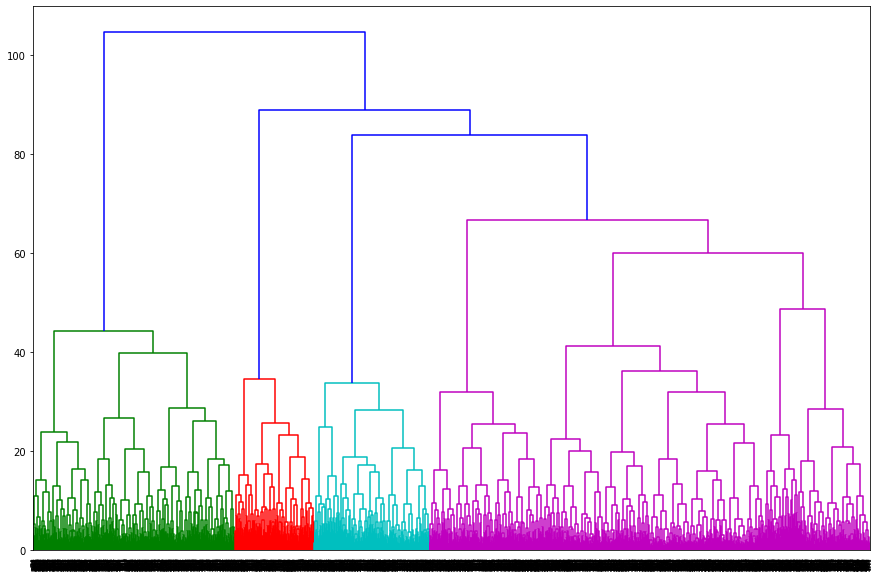

In [23]:
# Построим дендрограмму

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Цветом на диаграмме выделено 4 кластера, однако последний большой кластер можно разбить на два, таким образом получим 5 кластеров

Зададим модель k_means с числом кластеров 5 и обучим ее на стандартизированных данных

In [24]:
km = KMeans(n_clusters = 5, random_state = 0) 
labels = km.fit_predict(X_sc)

In [25]:
# Добавим столбец с номером кластера в датасет

df['cluster'] = labels

# Выведем статистику по средним значениям признаков по кластеру

g = df.groupby('cluster').mean()

cm = sns.light_palette("red", as_cmap=True)

g.style.background_gradient(cmap='bone_r')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1,10.8843,0.543027,29.9802,160.707,9.95054,4.73887,1.9833,1.97623,0.0276954
1,0.522078,0.862338,0.47013,0.306494,0,4.78701,0.425974,29.3013,143.958,4.47532,3.92468,1.84722,1.71637,0.267532
2,0.49505,0,0.463366,0.0792079,1,2.35248,0.215842,28.4772,135.458,2.19802,2.8099,1.66046,1.47732,0.443564
3,0.485737,1,0.350238,0.240095,1,1.94849,0.341521,28.168,131.622,1.85658,2.44057,1.24763,1.01298,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.66547,0.473118,30.1278,161.724,2.4552,4.89606,2.85153,2.84947,0.0681004


Некоторые принципы в разделении клиентов на кластеры можно увидеть сразу - 

 - В кластере 0 наибольшее число клиентов с партнерских программ, наибольшим сроком до окончания абонемента и наименьшим оттоком.
 
 - В кластере 1 у клиентов нет контактного телефона
 
 - В кластере 2 клиенты живут и работают вдали от фитнес-центра и редко используют партнерскую программу
 
 - В кластере 3 клиенты с наименьшим средним сроком абонемента, дополнительных трат, временем с первого визита, средним числом посесщений и наибольшим процентом оттока
 
 - В кластере 4 наиболее взрослые клиенты с наибольшими дополнительными тратами, временем с первого посещения и числом посещений.


In [26]:
cluster_0 = df[df['cluster']==0]
cluster_1 = df[df['cluster']==1]
cluster_2 = df[df['cluster']==2]
cluster_3 = df[df['cluster']==3]
cluster_4 = df[df['cluster']==4]

Построим распределения признаков для каждого кластера

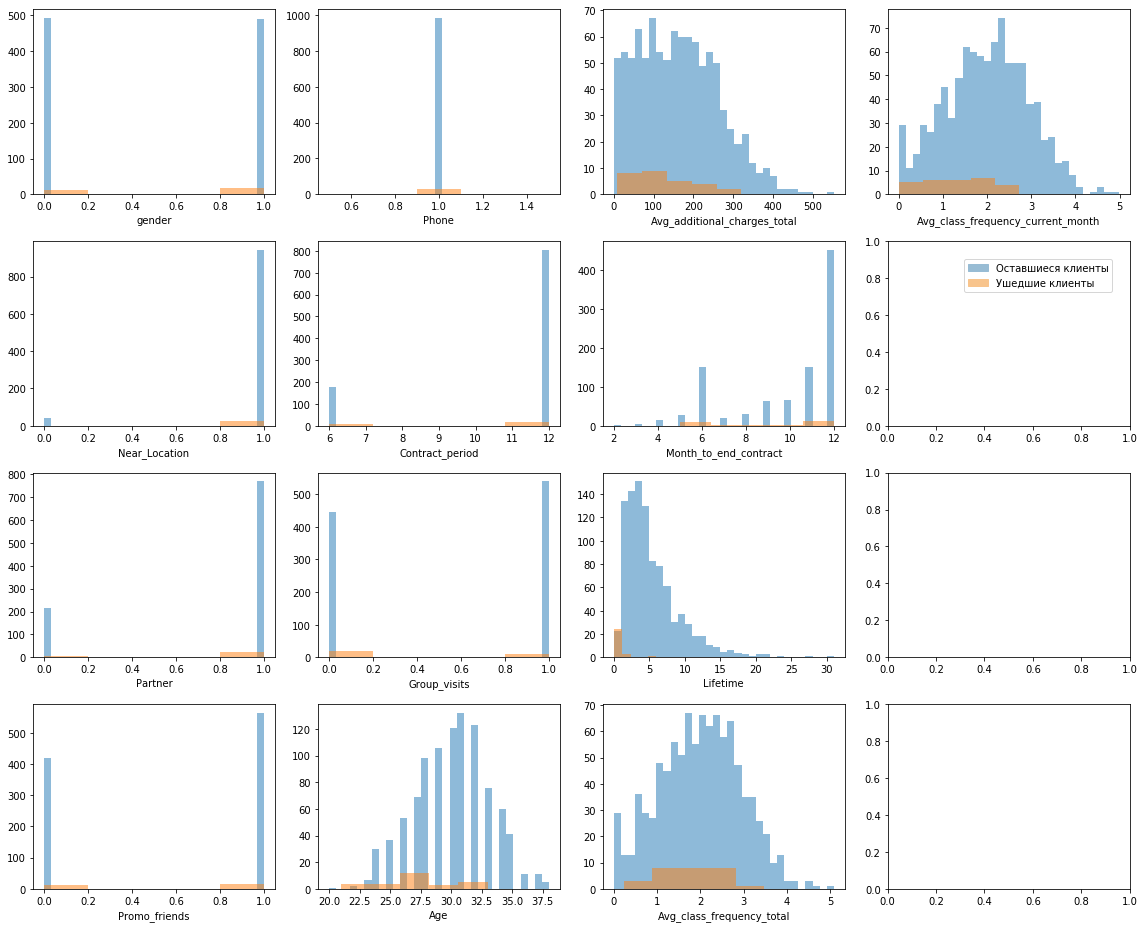

In [27]:
plot_dist(cluster_0)

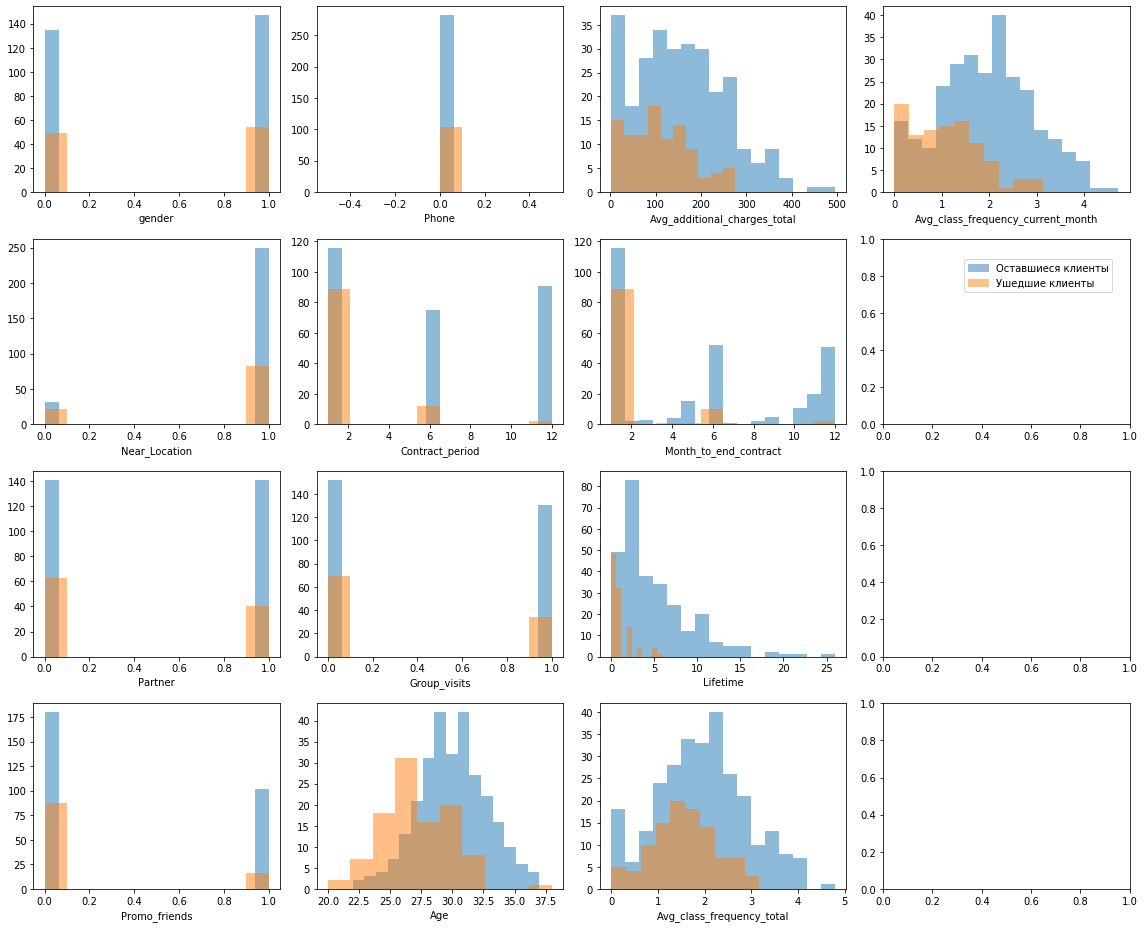

In [28]:
plot_dist(cluster_1)

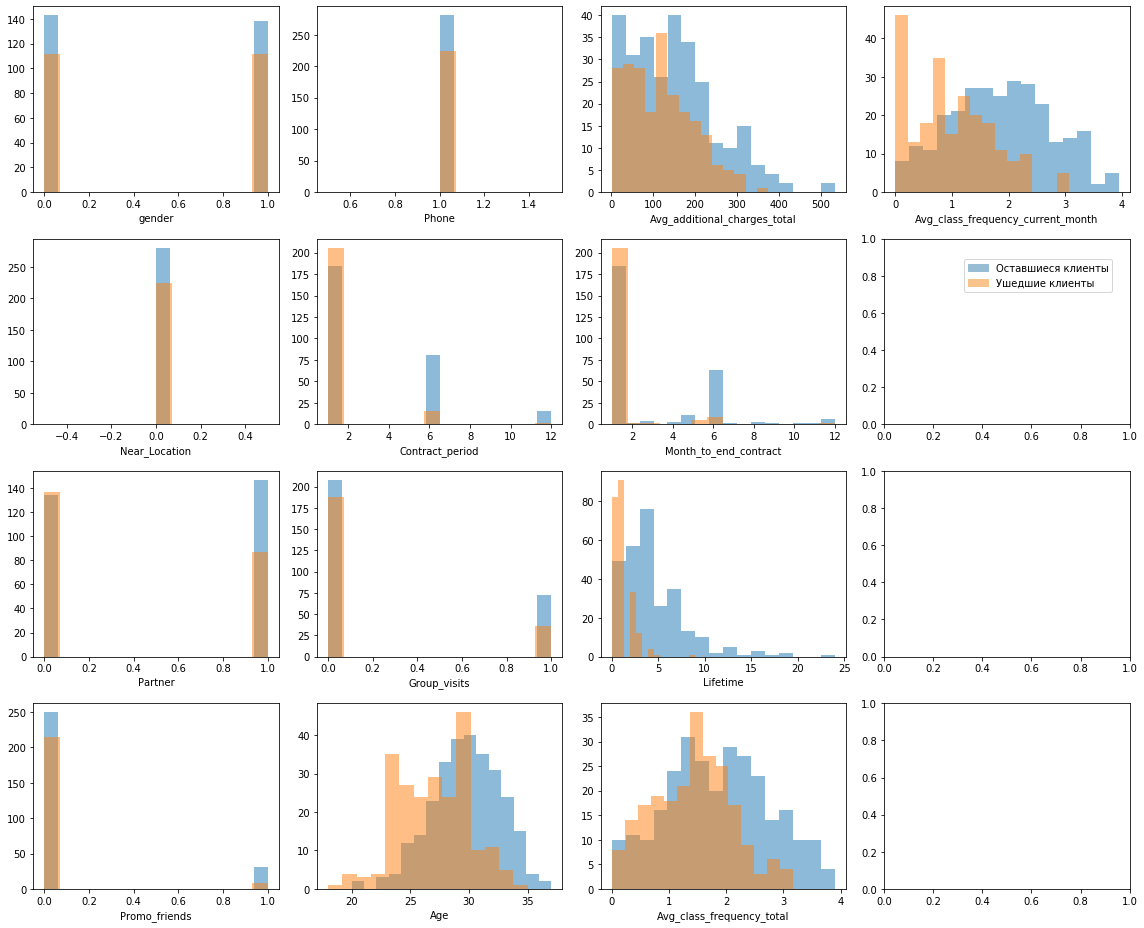

In [29]:
plot_dist(cluster_2)

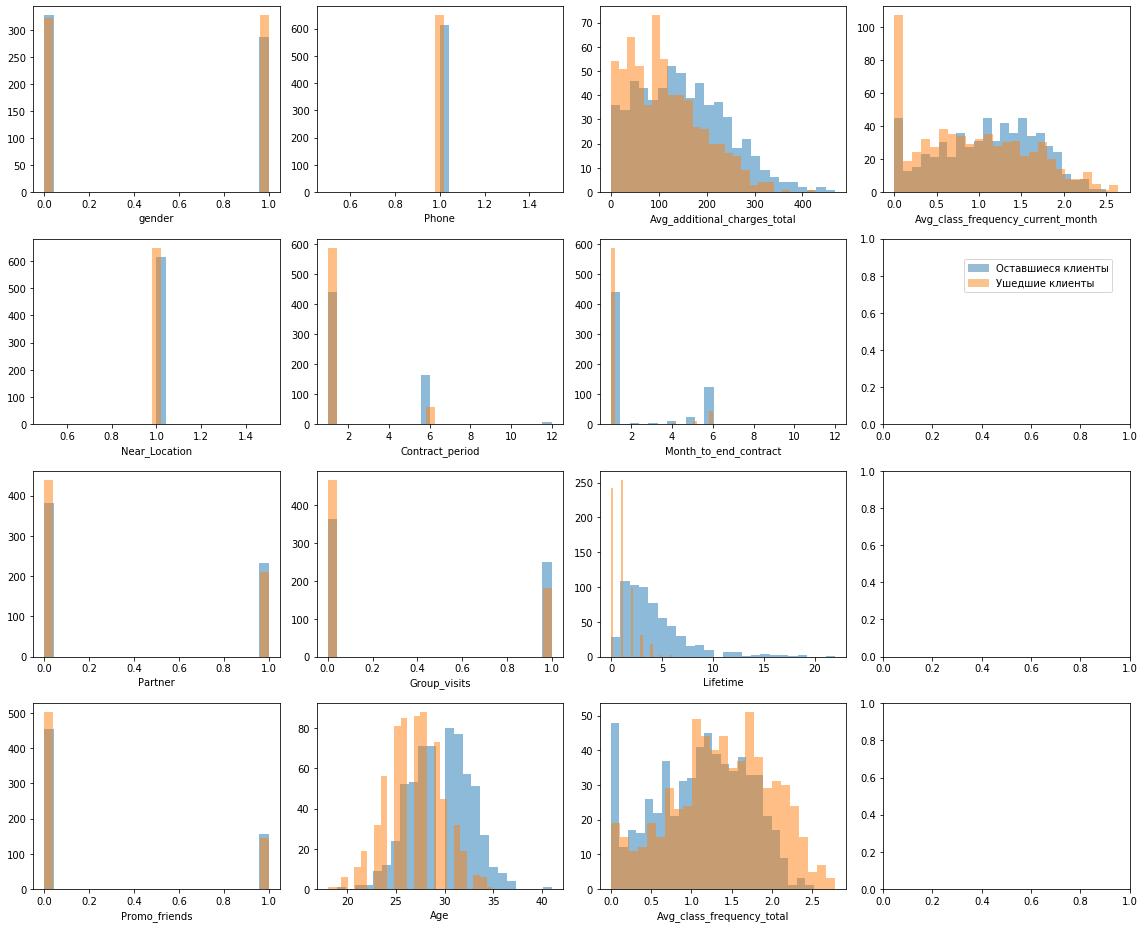

In [30]:
plot_dist(cluster_3)

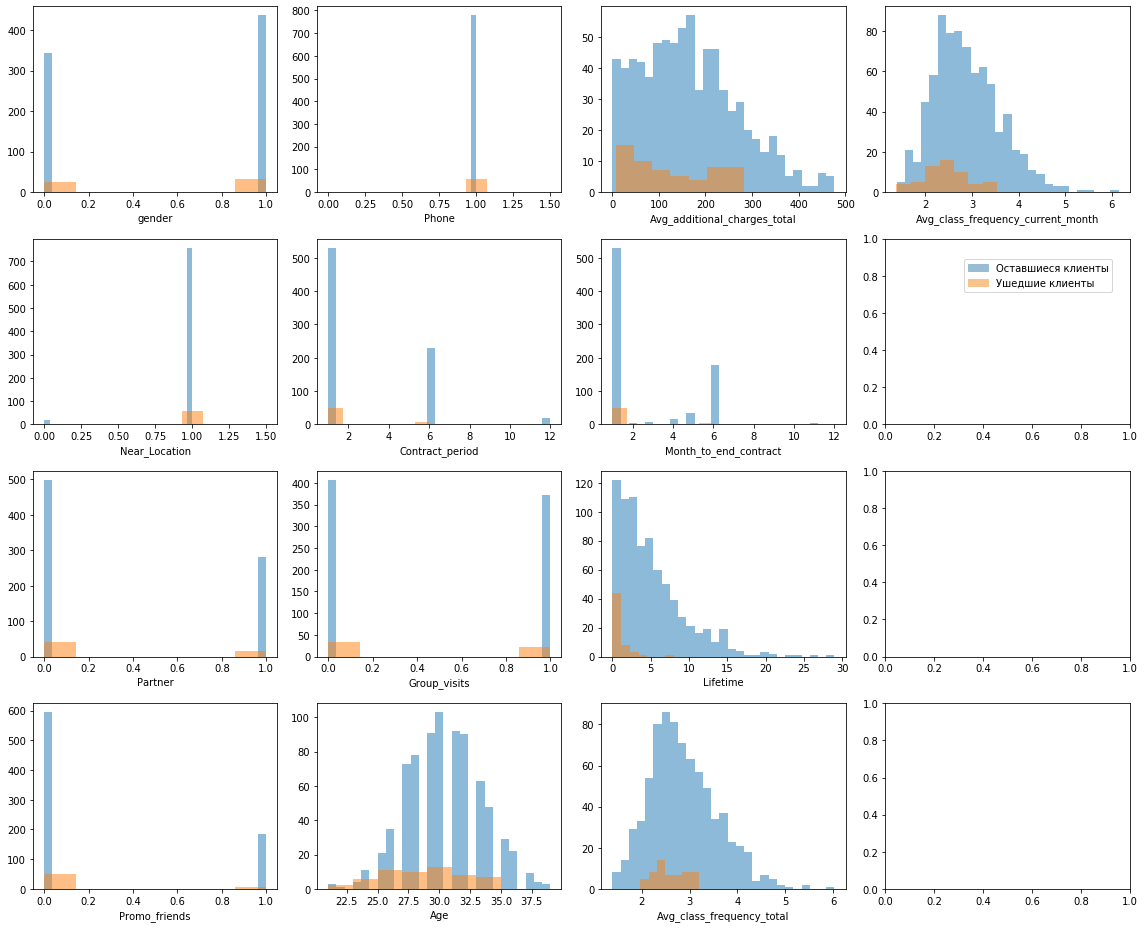

In [31]:
plot_dist(cluster_4)

Гистограммы признаков существенно различаются между кластерами как формой распределений, так и долей оттока клиентов. 

In [32]:
# Рассчитаем долю оттока в кластерах

churn_clust_tab = pd.DataFrame({'cluster':[0,1,2,3,4],
                               'churn rate': df.groupby('cluster')['Churn'].apply(lambda grp: round((grp.sum() / grp.count()),2))}).set_index('cluster')

churn_clust_tab.T


cluster,0,1,2,3,4
churn rate,0.03,0.27,0.44,0.51,0.07


Наименьшее число ушедших клиентов в кластерах 0 и 4. Больше всего отток в кластерах 2 и 3. 
Можно использовать параметры этих кластеров для определения клиентов, склонных к оттоку и наоборот.

<div class="alert alert-success">

**Комментарий ревьювера**

Были подобраны правильные визуализации и проведен качественный анализ! Супер 👍🏻
    
- Не обязательно было делить распределения по факту оттока, в задании этого не просят. 
- Можно сделать визуализации более компактными. Для логических и дискретных переменных стоит построить обычные столбчатые диаграммы, которые не накладываются друг на друга (пригодится sns.countplot), а для непрерывных — боксплоты (sns.boxplot). Так мы избежим наложения графиков друг на друга, и они будут проще восприниматься.
    
    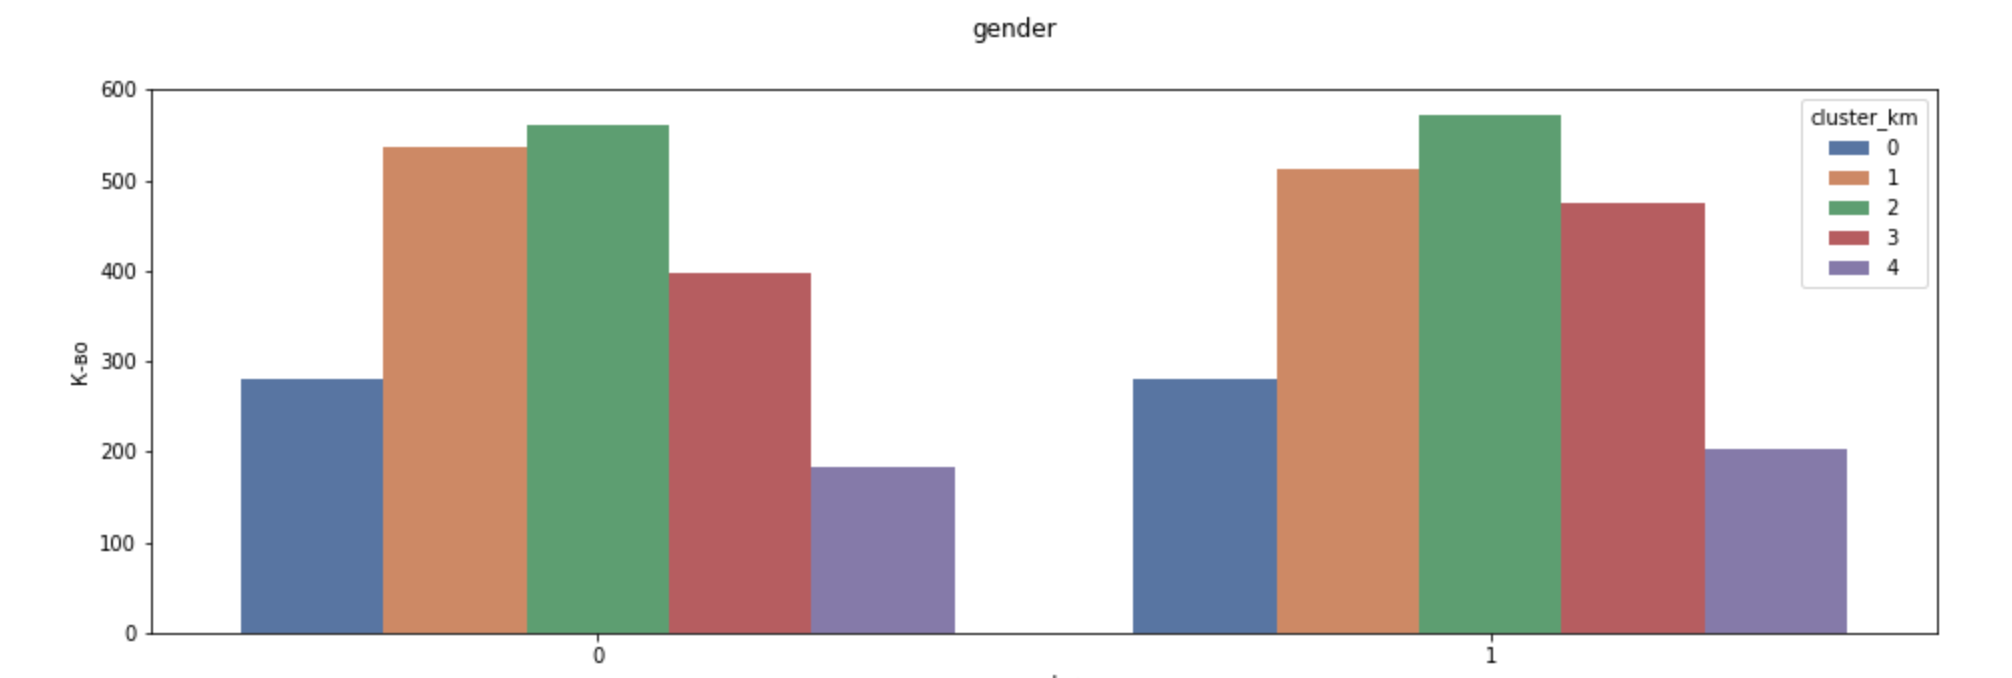
    
    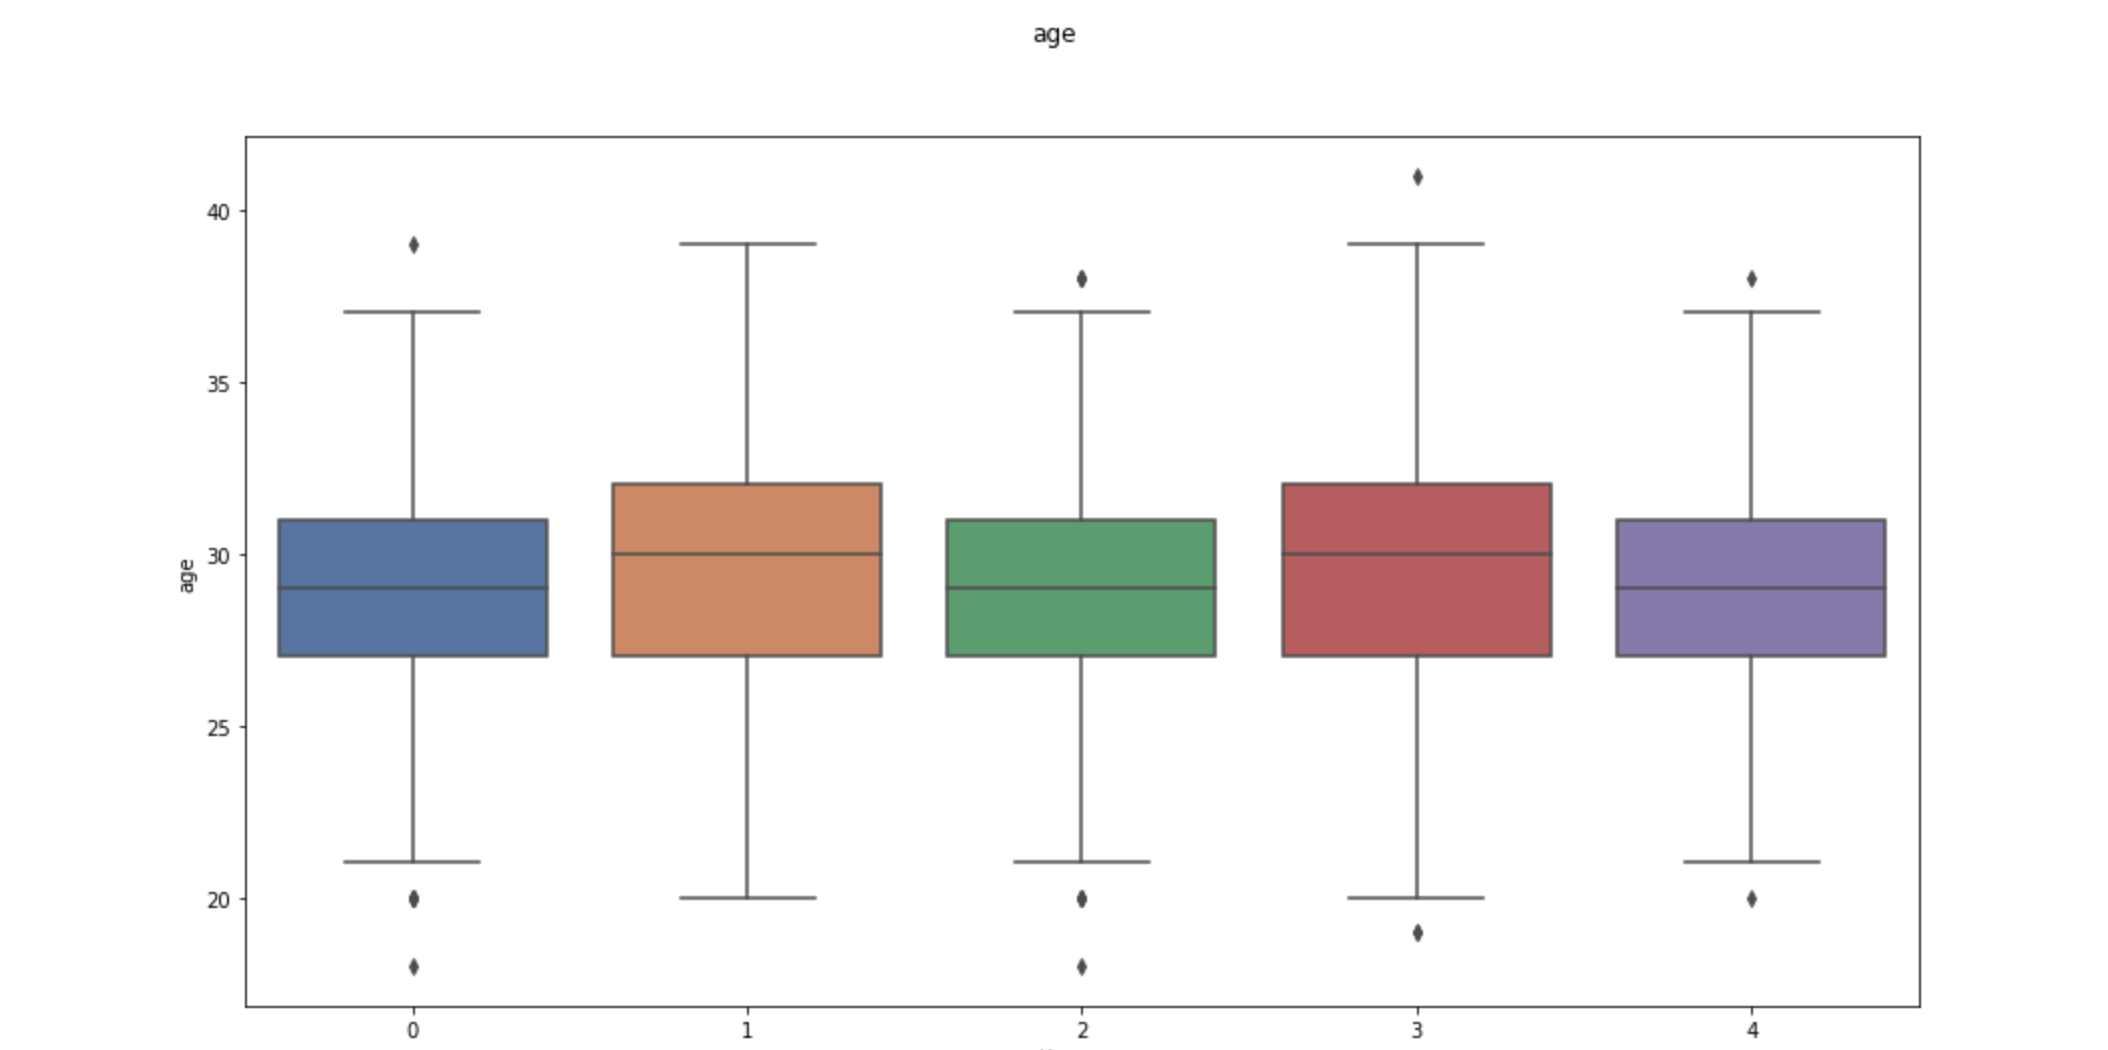

### Выводы и рекомендации

В ходе исследования выявлено, что в среднем люди, пришедшие по партнерской программе или сотрудники компании-партнера клуба реже уходят в отток, чем другие клиенты. Оставшийся срок абонемента также важный критерий для анализа оттока клиентов. Так у тех, кто уходит в отток он составляет 1.66 месяца против 5.28 у действующих клиентов. У ушедших клиентов так же значительно ниже средний срок текущего действующего абонемента и время в момента первого посещения.

Обнаружено, что большинство параметров слабо кореллируют с целевым столбцом Churn. Коэффициент корелляции на уровне 0.4 имеют поля с информацией о сроке абонемента, возрасте клиента, оставшееся время абонемента, время первого посещения и средняя частота посещений в неделю за предыдущий месяц.

Был проведен кластерный анализ клиентов. Некоторые принципы в разделении клиентов на кластеры можно увидеть сразу -

 -   В кластере 0 наибольшее число клиентов с партнерских программ, наибольшим сроком до окончания абонемента и наименьшим оттоком.

 -   В кластере 1 у клиентов нет контактного телефона

 -   В кластере 2 клиенты живут и работают вдали от фитнес-центра и редко используют партнерскую программу

 -   В кластере 3 клиенты с наименьшим средним сроком абонемента, дополнительных трат, временем с первого визита, средним числом посесщений и наибольшим процентом оттока

 -   В кластере 4 наиболее взрослые клиенты с наибольшими дополнительными тратами, временем с первого посещения и числом посещений.

Для улучшения показателя оттока необходимо уделить особое внимание клиентам из кластеров 2 и 3, как наиболее склонных к уходу. Можно попробовать использовать персональный маркетинг с предложениями, с целью увеличить ключевые показатели, такие как партнерские программы, время с первого визита, числом посещений.

<div class="alert alert-success">

**Комментарий ревьювера**

Интересные предложения 👍🏻